<a href="https://colab.research.google.com/github/Frost-Codes/Cat-Dog-Binary-Classification/blob/main/CatsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** Dog cat binary classification using Convent 😍 ***

In [1]:
import numpy as np
import random
import cv2
import os
from matplotlib import pyplot as plt

In [3]:
os.chdir('../')

In [4]:
os.chdir('./root')

In [5]:
os.getcwd()

'/root'

In [6]:
os.mkdir('./.kaggle')

In [7]:
os.chdir('./.kaggle')

In [ ]:
from google.colab import files
files.upload()

In [11]:
os.chdir('../')

In [12]:
os.chdir('./content')

In [13]:
os.listdir()

['.config', 'sample_data']

In [14]:
! chmod 600 /root/.kaggle/kaggle.json

In [15]:
! kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

 97% 762M/788M [00:05<00:00, 254MB/s]
100% 788M/788M [00:05<00:00, 157MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
os.listdir()

['.config', 'microsoft-catsvsdogs-dataset.zip', 'sample_data']

In [17]:
os.mkdir('.data')

In [18]:
! cp microsoft-catsvsdogs-dataset.zip .data/

In [19]:
os.listdir('./.data')

['microsoft-catsvsdogs-dataset.zip']

In [20]:
os.remove('./microsoft-catsvsdogs-dataset.zip')

In [2]:
os.chdir('./.data')

In [ ]:
! unzip microsoft-catsvsdogs-dataset.zip

In [23]:
os.listdir()

['PetImages',
 'microsoft-catsvsdogs-dataset.zip',
 'readme[1].txt',
 'MSR-LA - 3467.docx']

In [24]:
os.listdir('PetImages')

['Dog', 'Cat']

In [24]:
os.listdir()

['MSR-LA - 3467.docx',
 'readme[1].txt',
 'microsoft-catsvsdogs-dataset.zip',
 'PetImages']

In [ ]:
os.chdir('./PetImages')

In [ ]:
os.listdir()

['Cat', 'Dog']

In [25]:
os.getcwd()

'/content/.data'

In [ ]:
os.chdir('../')

In [5]:
os.getcwd()

'/content/.data'

In [3]:
DIRECTORY = r'./PetImages'
CATEGORIES = ['Dog', 'Cat']
IMAGE_SIZE = 100

In [4]:
data = []
for category in CATEGORIES:
  non_fixed = 0
  folder = os.path.join(DIRECTORY, category)
  label = CATEGORIES.index(category) # index 0 is dog index 1 is cat
  for image in os.listdir(folder):
    image_path = os.path.join(folder, image)
    try:
      image_array = cv2.imread(image_path)
      image_array = cv2.resize(image_array, (IMAGE_SIZE, IMAGE_SIZE))
      data.append([image_array, label])
    except:
      non_fixed +=1
  print(f'{category} non fixed: {non_fixed}')

Dog non fixed: 31
Cat non fixed: 25


In [28]:
len(data)

24946

In [5]:
random.shuffle(data)

In [6]:
x = []
y = []

In [7]:
for feature, label in data:
  x.append(feature)
  y.append(label)

In [8]:
x = np.array(x)
y = np.array(y)

In [9]:
print(len(x))
print(len(y))

24946
24946


In [ ]:
## data scale down

In [10]:
## splitting features
x_train = x[:16000]
x_test = x[22000:]

In [11]:
## splitting labels
y_train = y[:16000]
y_test = y[22000:]

In [ ]:
## Model Phase

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))


model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(Flatten())

model.add(Dense(64, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dense(1, activation='sigmoid'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        3

In [15]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['accuracy'])

In [16]:
print(x_train.shape)
print(y_train.shape)

(16000, 100, 100, 3)
(16000,)


In [17]:
## Scaling down features
x_train = np.divide(x_train, 255)
x_test = np.divide(x_test, 255)

In [18]:
history = model.fit(x_train, y_train, epochs=25, validation_split=(0.1), batch_size=128)

Epoch 1/25
113/113 [==============================] - 19s 63ms/step - loss: 0.7089 - accuracy: 0.5148 - val_loss: 0.6929 - val_accuracy: 0.5056
Epoch 2/25
113/113 [==============================] - 6s 55ms/step - loss: 0.6645 - accuracy: 0.5912 - val_loss: 0.7195 - val_accuracy: 0.5075
Epoch 3/25
113/113 [==============================] - 6s 52ms/step - loss: 0.6021 - accuracy: 0.6706 - val_loss: 0.6020 - val_accuracy: 0.6650
Epoch 4/25
113/113 [==============================] - 6s 55ms/step - loss: 0.5498 - accuracy: 0.7210 - val_loss: 0.5151 - val_accuracy: 0.7487
Epoch 5/25
113/113 [==============================] - 6s 53ms/step - loss: 0.5199 - accuracy: 0.7402 - val_loss: 0.4883 - val_accuracy: 0.7800
Epoch 6/25
113/113 [==============================] - 6s 54ms/step - loss: 0.4893 - accuracy: 0.7622 - val_loss: 0.4911 - val_accuracy: 0.7681
Epoch 7/25
113/113 [==============================] - 6s 53ms/step - loss: 0.4556 - accuracy: 0.7837 - val_loss: 0.4529 - val_accuracy: 0.806

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
train_accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']
epochs = range(1, len(validation_accuracy)+1)

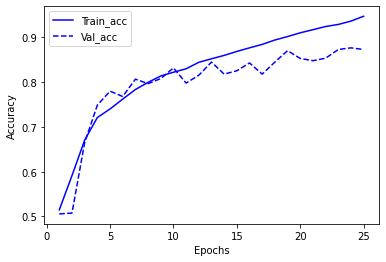

In [23]:
plt.plot(epochs, train_accuracy, 'b', label='Train_acc')
plt.plot(epochs, validation_accuracy, 'b--', label='Val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
x_test.shape

(2946, 100, 100, 3)

In [19]:
import gc

In [25]:
gc.collect()

2661

In [26]:
predictions = model.predict(x_test)

93/93 [==============================] - 1s 5ms/step


In [27]:
model.evaluate(x_test, y_test)

93/93 [==============================] - 1s 6ms/step - loss: 0.3478 - accuracy: 0.8737


[0.34781384468078613, 0.8737270832061768]

In [28]:
len(predictions)

2946

In [29]:
len(y_test)

2946

In [30]:
x_test_first = x[22000:22010]# batch of test images
y_test_first = y[22000:22010]

In [31]:
print(y_test_first) ## label  Dog:0 Cat:1)
print(predictions[0])

[0 0 1 1 0 0 0 0 0 1]
[7.3065705e-05]


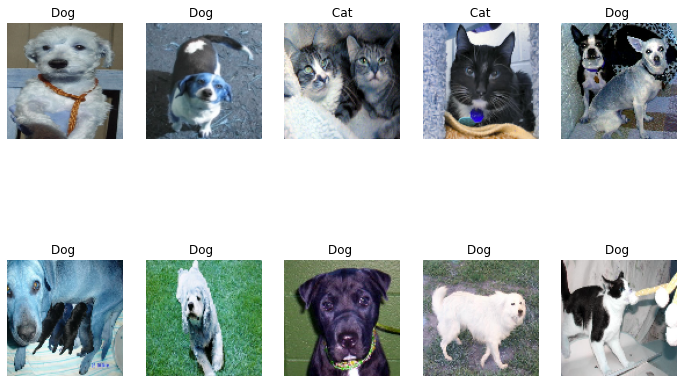

In [32]:
rows = 2
columns = 5
figure = plt.figure(figsize=(12,8))
for image in range(1, len(y_test_first) + 1):
  figure.add_subplot(rows, columns, image)
  plt.imshow(x_test_first[image-1])
  plt.axis('off')
  plt.title(f"{' Cat' if predictions[image-1] >= 0.75 else 'Dog'} ")
